## Machine learning for Health and Bioinformatics Assignment
Changhyun Kim (ID: 21134342)

### Data Cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read data
data = pd.read_csv('PatientTimeSeries.csv')
data.head()

,Patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,p116812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,1,0
1,p116812,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,2,0
2,p116812,102.0,100.0,NaN,99.0,84.0,76.0,18.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,3,0
3,p116812,124.0,100.0,NaN,97.0,70.0,55.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,4,0
4,p116812,98.0,100.0,NaN,95.0,73.0,62.0,18.0,NaN,NaN,...,7.5,NaN,6.8,NaN,276.0,59.0,1,-6.01,5,0


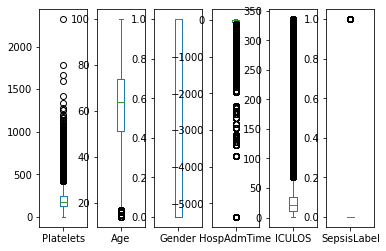

In [3]:
data.iloc[:,34:40].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

All outliers are going to be replaced with the average value of corresponding features.

In [4]:
cols = data.columns
cols = cols[1:39]
cols
summary_stat = data.describe()
# q1 = summary_stat.loc['25%', 'HR']
# q3 = summary_stat.loc['75%', 'HR']
# iqr = q3 - q1
# upper_bound = q3 + 1.5 * iqr
# lower_bound = q1 - 1.5 * iqr
# print(upper_bound)
# data.loc[(data['HR'] > upper_bound) | (data['HR'] < lower_bound), 'HR']
bound = {}
for col in cols:
    q1 = summary_stat.loc['25%', col]
    q3 = summary_stat.loc['75%', col]
    avg = summary_stat.loc['mean', col]
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    bound[col] = (lower_bound, upper_bound)
    data[col] = data[col].apply(lambda x : avg if x >= upper_bound or x <= lower_bound else x)    
data

,Patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,p116812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.00,1,-6.01,1.0,0
1,p116812,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.00,1,-6.01,2.0,0
2,p116812,102.0,100.0,NaN,99.0,84.0,76.0,18.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.00,1,-6.01,3.0,0
3,p116812,124.0,100.0,NaN,97.0,70.0,55.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.00,1,-6.01,4.0,0
4,p116812,98.0,100.0,NaN,95.0,73.0,62.0,18.0,NaN,NaN,...,7.5,NaN,6.8,NaN,276.0,59.00,1,-6.01,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,p016300,89.0,100.0,36.44,97.0,67.0,54.0,24.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.62,1,-115.55,6.0,0
1048571,p016300,92.0,100.0,NaN,130.0,86.0,62.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.62,1,-115.55,7.0,0
1048572,p016300,94.0,100.0,NaN,105.0,74.0,59.0,17.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,68.62,1,-115.55,8.0,0
1048573,p016300,95.0,100.0,36.89,89.0,65.0,53.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.62,1,-115.55,9.0,0


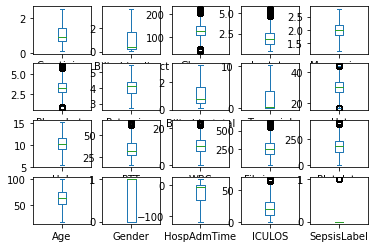

In [5]:
data.iloc[:,20:40].plot(kind='box', layout=(4,5),subplots=True, sharex=False, sharey=False)
plt.show()

The box plots show that many outliers are replaced with the average values comparing to the previous box plots. The black dots in the second box plots are not actually outliers but they are the data points which are really close to the each whisker. To be able to compare easily, there are summary statistics of each feature and their upper and lower bounds to regulate outliers from the original data

In [6]:
pd.DataFrame.from_dict(bound)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS
0,36.75,90.75,35.0,60.5,39.5,27.0,5.25,13.0,-9.0,15.925,...,16.35,5.35,5.4125,-1.7,-74.5,-48.5,17.475,-1.5,-117.115,-23.5
1,130.75,104.75,39.0,184.5,123.5,99.0,31.25,53.0,7.0,32.125,...,44.75,15.35,65.1125,23.1,617.5,419.5,107.915,2.5,70.205,68.5


In [7]:
data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
count,945030.000000,911165.000000,351898.000000,896310.000000,918122.000000,721427.000000,887150.000000,38404.000000,57094.000000,43994.000000,...,77254.000000,30944.000000,67082.000000,6789.000000,61992.000000,1.048575e+06,1.048575e+06,1.048567e+06,1.048575e+06,1.048575e+06
mean,84.073626,97.400732,36.981815,122.994406,81.618020,63.100957,18.449126,32.894158,-0.744810,24.024672,...,10.364040,34.641248,10.697031,271.044571,185.778499,6.199038e+01,5.604330e-01,-2.190869e+01,2.231903e+01,1.805307e-02
std,16.394830,2.274880,0.688462,21.790252,14.606443,12.435326,4.417874,6.958933,2.870535,3.316246,...,1.828097,9.173967,4.246537,116.122195,79.442991,1.637454e+01,4.963347e-01,2.835559e+01,1.401878e+01,1.331434e-01
min,37.000000,91.000000,35.030000,61.000000,39.670000,27.500000,5.500000,13.500000,-8.900000,16.000000,...,5.400000,16.600000,0.100000,34.000000,1.000000,1.800000e+01,0.000000e+00,-1.171100e+02,1.000000e+00,0.000000e+00
25%,72.000000,96.000000,36.500000,107.000000,71.000000,54.000000,15.500000,29.000000,-2.000000,22.000000,...,9.100000,27.800000,7.600000,185.000000,127.000000,5.149000e+01,0.000000e+00,-4.687000e+01,1.100000e+01,0.000000e+00
50%,83.500000,98.000000,37.000000,121.000000,80.000000,62.000000,18.000000,33.000000,-0.684051,24.000000,...,10.300000,32.400000,10.300000,254.000000,181.000000,6.400000e+01,1.000000e+00,-6.030000e+00,2.100000e+01,0.000000e+00
75%,95.000000,99.500000,37.440000,138.000000,91.000000,71.000000,21.000000,37.500000,1.000000,26.000000,...,11.600000,41.245061,13.200000,332.000000,234.000000,7.400000e+01,1.000000e+00,-4.000000e-02,3.200000e+01,0.000000e+00
max,130.500000,100.000000,38.970000,184.330000,123.330000,98.500000,31.000000,52.500000,6.800000,32.000000,...,15.300000,65.100000,23.050000,617.000000,419.000000,1.000000e+02,1.000000e+00,2.204000e+01,6.800000e+01,1.000000e+00


### Data Processing

In [8]:
cols = data.columns
measure_cols = data.columns[1:35]
demo = data.columns[35:39]
outcome = data.columns[39]
aggregations = {}
for col in cols:
    if col in measure_cols:
        aggregations[col] = ['first', 'last']
    elif col in demo:
        aggregations[col] = ['last']
    elif col in outcome:
        aggregations[col] = ['max']
    
aggregations
df2 = data.groupby('Patient_id').agg(aggregations)
df2.head()

HR        O2Sat              Temp           SBP         \
                first   last first       last  first   last  first   last   
Patient_id                                                                  
p000001     97.000000   84.0  95.0  97.193494  36.11  36.33   98.0   78.0   
p000002     61.000000   55.0  99.0  95.000000  36.44  36.11  124.0  114.0   
p000003     87.000000   78.0  96.0  97.000000  37.11  37.11  131.0  138.0   
p000007     84.572025  103.0  94.5  96.500000  37.56  37.67  147.5  108.0   
p000008     73.000000   84.0  99.0  95.000000  36.06  36.17  100.0  136.0   

               MAP        ...   WBC Fibrinogen       Platelets             \
             first  last  ...  last      first last      first       last   
Patient_id                ...                                               
p000001      75.33  44.0  ...  14.7        NaN  NaN  317.00000  338.00000   
p000002      65.00  51.0  ...  11.0        NaN  NaN  158.00000  158.00000   
p000003      70.33  83.0  ...   8.7        NaN  NaN  197.03375  197.03375   
p000007     102.00  77.0  ...   8.8        NaN  NaN   26.00000   43.00000   
p000008      67.00  81.0  ...   9.4        NaN  NaN  357.00000  205.00000   

              Age Gender HospAdmTime ICULOS SepsisLabel  
             last   last        last   last         max  
Patient_id                                               
p000001     83.14      0    -0.03000   54.0           0  
p000002     75.91      0   -98.60000   23.0           0  
p000003     45.82      0   -56.78107   48.0           0  
p000007     64.24      1    -0.05000   45.0           0  
p000008     87.08      1    -2.23000   40.0           0  

[5 rows x 73 columns]

In [9]:
df = pd.DataFrame()
for col in cols:
    if col in measure_cols:
        df[col] = df2[col]['last'] - df2[col]['first']
    elif col in demo:
        df[col] = df2[col]['last']
    elif col in outcome:
        df[col] = df2[col]['max']
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
Patient_id,,,,,,,,,,,,,,,,,,,,,
p000001,-13.000000,2.193494,0.22,-20.0,-31.330000,NaN,-1.000000,NaN,0.000000,0.000000,...,-0.300000,NaN,9.0,NaN,21.0,83.14,0,-0.03000,54.0,0
p000002,-6.000000,-4.000000,-0.33,-10.0,-14.000000,-7.0,-6.500000,NaN,NaN,0.000000,...,0.000000,NaN,0.0,NaN,0.0,75.91,0,-98.60000,23.0,0
p000003,-9.000000,1.000000,0.00,7.0,12.670000,3.0,-3.000000,NaN,5.684051,-3.000000,...,1.900000,-1.0,-1.3,NaN,0.0,45.82,0,-56.78107,48.0,0
p000007,18.427975,2.000000,0.11,-39.5,-25.000000,-20.0,-1.725505,NaN,0.000000,-4.063483,...,4.074452,0.5,-0.5,NaN,17.0,64.24,1,-0.05000,45.0,0
p000008,11.000000,-4.000000,0.11,36.0,14.000000,3.5,-1.500000,NaN,2.000000,1.000000,...,-2.800000,NaN,-2.0,NaN,-152.0,87.08,1,-2.23000,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p119995,-1.000000,0.000000,-0.20,10.0,1.000000,-4.0,-3.000000,NaN,NaN,NaN,...,0.000000,NaN,0.0,0.0,0.0,76.00,1,-14.90000,42.0,0
p119996,1.000000,-2.000000,0.00,-27.0,-22.000000,-22.0,-2.000000,NaN,NaN,NaN,...,0.000000,NaN,0.0,NaN,0.0,84.00,0,-6.69000,48.0,0
p119997,-12.000000,3.000000,1.00,-7.0,18.000000,0.0,6.000000,0.0,NaN,NaN,...,4.574452,0.0,-0.8,NaN,-24.0,30.00,1,-0.02000,25.0,0


The matrix contains demographic variables as well so that its shape is 27186 x 39

### Understanding the data

This section consists of 4 parts
- Dataframe grouping by outcome variable (SepsisLabel = 1 or 0)
- Performs t-test whether there is significant difference of means between two dataframes
- Features distributions across each outcome
- Measures missingness of each feature and imputation using KNNImputer

#### Part 1. Dataframe subsetting
This part divides the dataframe into two subset by the outcome variable (SepsisLabel)


In [10]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
count,27184.000000,27173.000000,26984.000000,27009.000000,27123.000000,22235.000000,27143.000000,2158.000000,8908.000000,13623.000000,...,25534.000000,13672.000000,25421.000000,3056.000000,25448.000000,27186.000000,27186.000000,27185.000000,27186.000000,27186.000000
mean,-0.742612,-0.988459,0.241653,-0.650400,-1.312686,-1.289284,1.181092,1.367192,0.476502,0.601439,...,-0.220180,-0.566587,-0.150588,17.380480,-8.463058,61.618399,0.560987,-21.548266,36.200322,0.073163
std,16.736818,2.750414,0.836376,24.192553,16.689580,13.686577,5.493635,7.520192,2.822645,2.775081,...,1.236628,6.718491,2.993529,75.171336,40.232762,16.473530,0.496276,28.137185,13.211442,0.260408
min,-83.000000,-9.000000,-3.300000,-98.000000,-74.500000,-61.000000,-21.000000,-33.000000,-11.600000,-11.000000,...,-8.000000,-42.000000,-19.900000,-396.000000,-320.000000,18.000000,0.000000,-117.110000,8.000000,0.000000
25%,-11.000000,-3.000000,-0.300000,-16.000000,-12.000000,-10.000000,-2.000000,-2.000000,-1.000000,0.000000,...,-0.800000,-0.700000,-1.100000,0.000000,-21.000000,51.000000,0.000000,-43.550000,25.000000,0.000000
50%,-0.463987,-1.000000,0.200000,-0.500000,-1.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,63.055000,1.000000,-6.050000,38.000000,0.000000
75%,9.000000,0.500000,0.730000,15.000000,9.000000,7.000000,4.500000,5.500000,2.000000,2.000000,...,0.100000,0.000000,0.600000,7.000000,0.000000,74.000000,1.000000,-0.040000,46.750000,0.000000
max,76.000000,9.000000,3.740000,96.000000,70.500000,64.000000,23.500000,30.000000,14.000000,16.000000,...,7.000000,39.200000,20.600000,484.000000,331.000000,100.000000,1.000000,22.040000,68.000000,1.000000


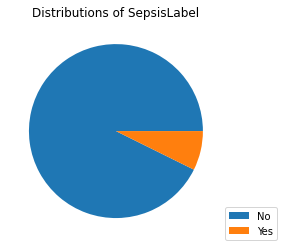

In [11]:
labels = ['No', 'Yes']
plt.pie(df['SepsisLabel'].value_counts())
plt.title('Distributions of SepsisLabel')
plt.legend(loc=(1,0), labels=labels)
plt.show()

In [12]:
# df.groupby('SepsisLabel').plot(kind='hist', layout=(6,8),figsize=(16,10), subplots=True)
sepsis_group = df[df['SepsisLabel'] == 1]
nonsepsis_group = df[df['SepsisLabel'] != 1]

sepsis_group.shape

(1989, 39)

In [13]:
nonsepsis_group.shape

(25197, 39)

#### Part2. t-test

Performed t-test for each feature in two subsets\
H0: no difference in means between two samples\
H1: difference in means between two samples

In [14]:
import scipy.stats as stats

In [15]:
cols = sepsis_group.columns[0:38]
diff = []
non_diff = []
for col in cols:
    stat, pvalue = stats.ttest_ind(sepsis_group[col], nonsepsis_group[col], nan_policy='omit')
    if pvalue < 0.05:
        diff.append(col)
    else:
        non_diff.append(col)
    print(col, 'statistics: ' + str(stat), 'p-value: ' + str(pvalue))


HR statistics: 8.239802483295882 p-value: 1.8017597747086644e-16
O2Sat statistics: 5.717752542890218 p-value: 1.0907283156890522e-08
Temp statistics: 10.041210331080968 p-value: 1.1053320057543049e-23
SBP statistics: -3.6757902607974704 p-value: 0.00023757323207638056
MAP statistics: -3.9207183555720744 p-value: 8.850237906078438e-05
DBP statistics: -4.112470250010739 p-value: 3.928546862153708e-05
Resp statistics: -2.6290847624376474 p-value: 0.008566326414200322
EtCO2 statistics: -1.7174923180318482 p-value: 0.08603285830960349
BaseExcess statistics: 3.2485289326010562 p-value: 0.0011643344979083165
HCO3 statistics: 1.746924812665035 p-value: 0.08067291883610189
FiO2 statistics: 6.25832836016367 p-value: 4.02351682915542e-10
pH statistics: 1.9271526099398408 p-value: 0.0539828101696273
PaCO2 statistics: 0.1122352961473454 p-value: 0.910638665826183
SaO2 statistics: -0.0020026374728026493 p-value: 0.9984021728485459
AST statistics: 0.844167469669879 p-value: 0.39859672125899204
BUN st

In [16]:
print(diff)
print(non_diff)

['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'FiO2', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Lactate', 'Magnesium', 'Bilirubin_total', 'Hgb', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'ICULOS']
['EtCO2', 'HCO3', 'pH', 'PaCO2', 'SaO2', 'AST', 'Glucose', 'Phosphate', 'Potassium', 'TroponinI', 'Hct', 'PTT', 'HospAdmTime']


In [17]:
# Summary statistics
sepsis_group.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
count,1989.000000,1988.000000,1963.000000,1918.000000,1989.000000,1666.000000,1979.000000,354.000000,1067.000000,1183.000000,...,1837.000000,1318.000000,1825.000000,397.000000,1823.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.0
mean,2.230691,-0.649096,0.423843,-2.607046,-2.724705,-2.615129,0.868517,0.739830,0.739725,0.736117,...,-0.307053,-0.250039,0.278093,30.287879,-5.368531,62.428382,0.584213,-21.738279,27.341995,1.0
std,18.964518,2.838972,0.972936,26.341427,17.315277,13.849413,5.871001,7.359467,3.359781,3.358464,...,1.462887,7.698951,3.922704,92.027856,56.361020,16.319702,0.492981,29.069982,14.509846,0.0
min,-67.000000,-9.000000,-2.720000,-96.500000,-66.000000,-57.500000,-20.000000,-26.500000,-10.400000,-11.000000,...,-6.800000,-42.000000,-19.900000,-268.000000,-246.000000,18.000000,0.000000,-116.550000,8.000000,1.0
25%,-9.000000,-2.500000,-0.200000,-19.000000,-13.500000,-11.000000,-3.000000,-3.000000,-1.000000,-0.936517,...,-1.000000,-1.200000,-1.100000,0.000000,-25.500000,52.000000,0.000000,-56.781070,16.000000,1.0
50%,2.000000,-0.193494,0.300000,-2.882973,-3.000000,-2.500000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.000000,-2.850000,27.027921,1.0
75%,14.000000,1.000000,1.050000,13.000000,8.000000,5.000000,4.000000,4.500000,2.000000,2.000000,...,0.100000,1.000000,1.800000,33.000000,6.500000,75.000000,1.000000,-0.020000,31.000000,1.0
max,76.000000,9.000000,3.600000,95.000000,65.000000,48.000000,22.500000,20.500000,12.000000,13.000000,...,6.500000,36.100000,15.100000,408.000000,331.000000,100.000000,1.000000,16.020000,68.000000,1.0


In [18]:
# Summary statistics
nonsepsis_group.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
count,25195.000000,25185.000000,25021.000000,25091.000000,25134.000000,20569.000000,25164.000000,1804.000000,7841.000000,12440.000000,...,23697.000000,12354.000000,23596.000000,2659.000000,23625.000000,25197.000000,25197.000000,25196.000000,25197.000000,25197.0
mean,-0.977337,-1.015246,0.227359,-0.500830,-1.200944,-1.181897,1.205675,1.490300,0.440683,0.588631,...,-0.213446,-0.600358,-0.183744,15.453350,-8.701844,61.554460,0.559154,-21.533266,36.899580,0.0
std,16.525843,2.741571,0.823024,24.014392,16.634299,13.668014,5.462217,7.547214,2.739726,2.712893,...,1.217111,6.604762,2.906801,72.141252,38.701364,16.484238,0.496498,28.062768,12.846233,0.0
min,-83.000000,-9.000000,-3.300000,-98.000000,-74.500000,-61.000000,-21.000000,-33.000000,-11.600000,-10.000000,...,-8.000000,-39.200000,-15.300000,-396.000000,-320.000000,18.000000,0.000000,-117.110000,8.000000,0.0
25%,-11.000000,-3.000000,-0.300000,-16.000000,-12.000000,-10.000000,-2.000000,-2.000000,-1.000000,0.000000,...,-0.700000,-0.600000,-1.100000,0.000000,-21.000000,51.000000,0.000000,-42.192500,25.000000,0.0
50%,-0.500000,-1.000000,0.170000,0.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,-6.210000,39.000000,0.0
75%,9.000000,0.500000,0.720000,15.000000,9.000000,7.000000,4.500000,5.500000,2.000000,2.000000,...,0.100000,0.000000,0.500000,3.500000,0.000000,74.000000,1.000000,-0.050000,47.000000,0.0
max,75.000000,9.000000,3.740000,96.000000,70.500000,64.000000,23.500000,30.000000,14.000000,16.000000,...,7.000000,39.200000,20.600000,484.000000,246.000000,100.000000,1.000000,22.040000,68.000000,0.0


#### Part3. Plot distributions of each feature across outcome variable


In [19]:
def plot_distrib(df, title):    
    fig, axes = plt.subplots(7, 5, figsize=(16,10), sharex=False, sharey=False)
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

    for i, ax in enumerate(axes.flatten()):
        x = df.iloc[:,i]
        ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, color=colors[i % 5])
        ax.set_title(df.columns[i])

    plt.suptitle(title, size=16)
    plt.tight_layout();

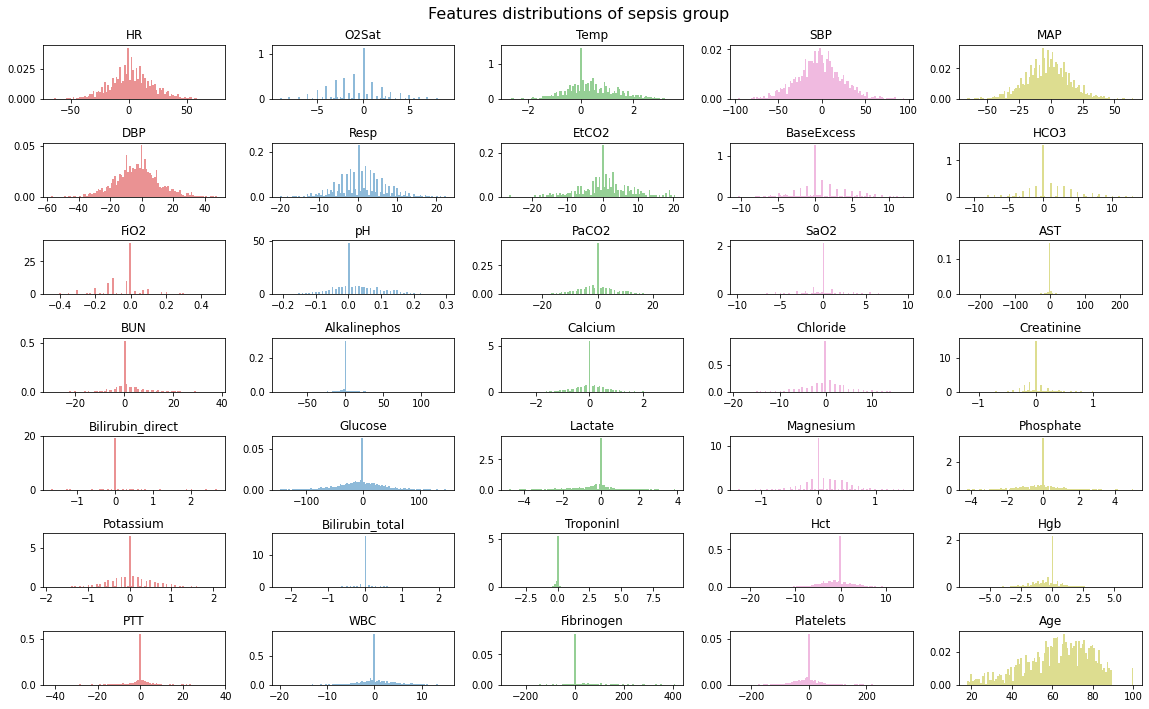

In [20]:
plot_distrib(sepsis_group, 'Features distributions of sepsis group')

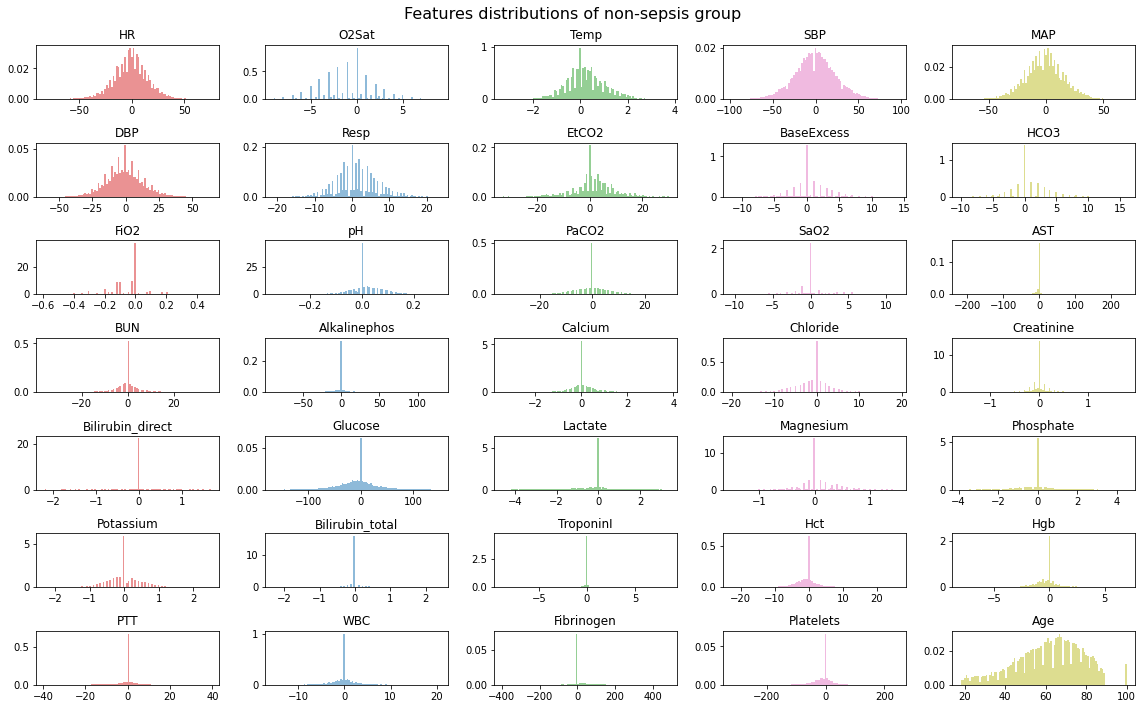

In [21]:
plot_distrib(nonsepsis_group, 'Features distributions of non-sepsis group')

#### Part 4. Measures missingness and imputation

Calculates the percentage of missingess of each feature. Then, drop the features if their missingness are over 60% due to too many missing values to perform imputation. With the remained features, the missing values are imputed by using KNNImputer

In [22]:
n = len(df)
print('Missingness in each feature (%)')
miss = df.isnull().sum() / n * 100
exclude = miss[miss > 60].index
print(exclude)
miss

Missingness in each feature (%)
Index(['EtCO2', 'BaseExcess', 'SaO2', 'AST', 'Alkalinephos',
       'Bilirubin_direct', 'Lactate', 'Bilirubin_total', 'TroponinI',
       'Fibrinogen'],
      dtype='object')


HR                   0.007357
O2Sat                0.047819
Temp                 0.743030
SBP                  0.651070
MAP                  0.231737
DBP                 18.211579
Resp                 0.158170
EtCO2               92.062091
BaseExcess          67.233135
HCO3                49.889649
FiO2                55.749283
pH                  53.100861
PaCO2               54.517031
SaO2                67.556831
AST                 64.437578
BUN                  5.105569
Alkalinephos        64.886339
Calcium             13.286250
Chloride            46.946958
Creatinine           5.175458
Bilirubin_direct    94.809829
Glucose              3.998382
Lactate             69.024498
Magnesium           12.212168
Phosphate           29.864636
Potassium            4.737733
Bilirubin_total     64.746561
TroponinI           82.262929
Hct                  5.771353
Hgb                  6.076657
PTT                 49.709409
WBC                  6.492312
Fibrinogen          88.758920
Platelets 

In [23]:
df = df[df.columns[~df.columns.isin(exclude)]]
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HCO3,FiO2,pH,...,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
Patient_id,,,,,,,,,,,,,,,,,,,,,
p000001,-13.000000,2.193494,0.22,-20.0,-31.330000,NaN,-1.000000,0.000000,-0.030000,-0.04,...,-1.00000,-0.300000,NaN,9.0,21.0,83.14,0,-0.03000,54.0,0
p000002,-6.000000,-4.000000,-0.33,-10.0,-14.000000,-7.0,-6.500000,0.000000,NaN,NaN,...,0.00000,0.000000,NaN,0.0,0.0,75.91,0,-98.60000,23.0,0
p000003,-9.000000,1.000000,0.00,7.0,12.670000,3.0,-3.000000,-3.000000,0.300000,-0.02,...,5.20000,1.900000,-1.0,-1.3,0.0,45.82,0,-56.78107,48.0,0
p000007,18.427975,2.000000,0.11,-39.5,-25.000000,-20.0,-1.725505,-4.063483,-0.124585,0.11,...,5.91209,4.074452,0.5,-0.5,17.0,64.24,1,-0.05000,45.0,0
p000008,11.000000,-4.000000,0.11,36.0,14.000000,3.5,-1.500000,1.000000,NaN,0.09,...,-7.90000,-2.800000,NaN,-2.0,-152.0,87.08,1,-2.23000,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p119995,-1.000000,0.000000,-0.20,10.0,1.000000,-4.0,-3.000000,NaN,NaN,NaN,...,0.00000,0.000000,NaN,0.0,0.0,76.00,1,-14.90000,42.0,0
p119996,1.000000,-2.000000,0.00,-27.0,-22.000000,-22.0,-2.000000,NaN,NaN,NaN,...,0.00000,0.000000,NaN,0.0,0.0,84.00,0,-6.69000,48.0,0
p119997,-12.000000,3.000000,1.00,-7.0,18.000000,0.0,6.000000,NaN,NaN,NaN,...,13.21209,4.574452,0.0,-0.8,-24.0,30.00,1,-0.02000,25.0,0


Based on the simulation study by Wahl et al. (2016), the model that imputation is followed by resampling method shows almost unbiased estimates. Therefore, the data is firstly split and standardised and the training and test set is imputed separately using KNNImputer

In [24]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [25]:
imputer = KNNImputer()
X = df.iloc[:,0:28]
y = df['SepsisLabel']
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test), columns = X.columns)

In [26]:
print('X_train missing values:', X_train_imputed.isnull().sum().values.sum())
print('X_test missing values:', X_test_imputed.isnull().sum().values.sum())

X_train missing values: 0
X_test missing values: 0


### Classifier Implementation
using XGBoost

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean

In [49]:
# Plot confusion matrix and print classification report for checking model's performance
def calc_performance(y_test, y_pred):
    cm= confusion_matrix(y_test, y_pred)  

    #class_names contains the labels we would like to use. This can be ignored.
    class_names  =[0, 1]
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    print(disp.confusion_matrix)
    print(classification_report(y_test,y_pred))
    disp.plot()
    plt.show()

In [33]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 17644, 1: 1386})
Counter({0: 7553, 1: 603})


#### Hyperparameter tuning
In hyperparameter tuning section, the model parameters that involves model performance will be tuned through grid search cross validation to maximise its generalisability for unseen data. The selected hyperparameters are followed as:

- `scale_pos_weight`\
Since the data is highly imbalance, we need to deal with it by differentiating the weights of each class. Based on the [documentation](https://xgboost.readthedocs.io/en/stable/parameter.html), the typical consideration of this parameter is `sum(negative instances) / sum(positive instances)`. This parameter won't be tuned during grid search cross-validation due to it has proper criterion.
- 

In [54]:
counter = Counter(y_train)
balance_weight = counter[0] / counter[1]
print('Balance_weight:', balance_weight)
base_model = XGBClassifier(scale_pos_weight=balance_weight)
base_model.fit(X_train_imputed, y_train.values.ravel())

Balance_weight: 12.73015873015873


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [58]:
y_pred = base_model.predict(X_train_imputed)

[[17537   107]
 [    1  1385]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17644
           1       0.93      1.00      0.96      1386

    accuracy                           0.99     19030
   macro avg       0.96      1.00      0.98     19030
weighted avg       0.99      0.99      0.99     19030



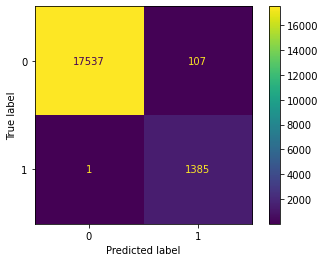

In [59]:
calc_performance(y_train, y_pred)

In [57]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(base_model, X_train_imputed, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.87175
